### Gaussian Mixture Models <br/>
GMM can be used to cluster unlabeled data similar to K-means. <br/>
advantages of gaussian mixture models over k-means is , k-means does not account for variance <br/>
GMMs handle data (clusters) of any shape




In [25]:
# pip install plotnine

In [34]:
%%time
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from plotnine import *
import seaborn as sns



Wall time: 993 µs


In [35]:
data = load_iris()

In [36]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
print("data_scaled",data_scaled)

data_scaled [[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 

In [42]:
k_range = (1,21) 
models = [ GaussianMixture(n_components=k, covariance_type='diag').fit(data_scaled) for k in k_range ]

Given a model, we can use one of several means to evaluate how well it fits the data. For example, <br/>
there is the Aikaki Information Criterion (AIC) and the Bayesian Information Criterion (BIC) <br/>

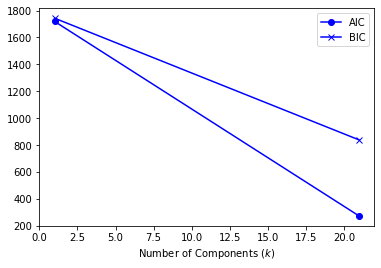

In [40]:
# Compute metrics to determine best hyperparameter
AIC = [m.aic(data_scaled) for m in models]
BIC = [m.bic(data_scaled) for m in models]
# Plot these metrics
plt.plot(k_range, AIC, 'bo-', label='AIC',)
plt.plot(k_range, BIC, 'bx-', label='BIC')
plt.xlabel('Number of Components ($k$)')
plt.legend()


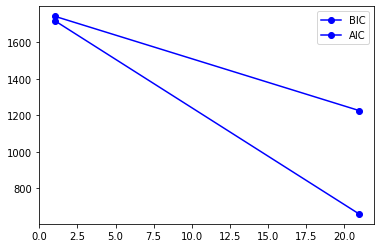

In [47]:
AIC = [m.aic(data_scaled) for m in models]
BIC = [m.bic(data_scaled) for m in models]

plt.plot(k_range, BIC, label='BIC')
plt.plot(k_range, AIC, label='AIC')
plt.legend()

In [12]:
gmm_aic = GaussianMixture(n_components=3)
gmm_aic.fit(data_scaled)
y_predicted_aic = gmm_aic.predict(data_scaled)
df['y_predicted_aic'] = y_predicted_aic

In [14]:
df.y_predicted_aic.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [21]:
df['target'] = data.target
np.unique(df['target'])

array([0, 1, 2])

In [23]:
# Prep
k_labels = df.y_predicted_aic.values  # Get cluster labels
k_labels_matched = np.empty_like(k_labels)

# For each cluster label...
for k in np.unique(k_labels):

    # ...find and assign the best-matching truth label
    match_nums = [np.sum((k_labels==k)&(df['target'] ==t)) for t in np.unique(df['target'])]
    k_labels_matched[k_labels==k] = np.unique(df['target'])[np.argmax(match_nums)]

In [24]:
k_labels_matched

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [76]:
gmm_bic = GaussianMixture(n_components=3)
gmm_bic.fit(df)
y_predicted_bic = gmm_bic.predict(df)
df['y_predicted_bic'] = y_predicted_bic

In [70]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_predicted_aic
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [73]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_predicted_aic,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,2
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,0,2
148,6.2,3.4,5.4,2.3,0,2


In [25]:
# Compute confusion matrix for AIC
from sklearn.metrics import confusion_matrix,accuracy_score
cm_aic = confusion_matrix(df['target'], k_labels_matched)
cm_aic


array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  0, 50]], dtype=int64)

In [27]:
print(accuracy_score(df['target'], k_labels_matched))

0.9666666666666667


In [77]:
df['y_predicted_bic'] = y_predicted_bic
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_predicted_aic,target,y_predicted_bic
0,5.1,3.5,1.4,0.2,1,0,1
1,4.9,3.0,1.4,0.2,1,0,1
2,4.7,3.2,1.3,0.2,1,0,1
3,4.6,3.1,1.5,0.2,1,0,1
4,5.0,3.6,1.4,0.2,1,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,2,2
146,6.3,2.5,5.0,1.9,0,2,2
147,6.5,3.0,5.2,2.0,0,2,2
148,6.2,3.4,5.4,2.3,0,2,2


In [78]:
# Compute confusion matrix for BIC
from sklearn.metrics import confusion_matrix,accuracy_score
cm_bic = confusion_matrix(df['target'], df['y_predicted_bic'])
cm_bic

array([[ 0, 50,  0],
       [45,  0,  5],
       [ 0,  0, 50]], dtype=int64)

In [79]:
print(accuracy_score(df['target'], df['y_predicted_bic']))

0.3333333333333333
